<a href="https://colab.research.google.com/github/ViuDaniel/08MBID-/blob/main/Practica_visu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercico Practico
URL dataset:
 - https://www.kaggle.com/nehalbirla/motorcycle-dataset/discussion/191080

descripción:
- name: name of the motorcycle
- selling_price: Price at which seller is selling the motorcycle
- year: year in which bike was bought
- seller_type: Tells if a Seller is Individual or a Dealer
- owner: Number of previous owners of the vehicle.
- km_driven: Number of kilometre motorcycle has traveled
- ex_showroom_price: Showroom price of the motorcycle

In [3]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
from numpy import corrcoef, transpose, arange
import itertools
import seaborn as sns
import sklearn.feature_selection
import pandas as pd
import io
import requests
import seaborn as sns
import timeit


In [4]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [5]:
bikes = upload_files()
bikes.head()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv
User uploaded file "BIKE DETAILS.csv" with length 66450 bytes


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [6]:
bikes['num_owner'] = np.where((bikes['owner'].str.contains('1st')),1,np.nan)
bikes['num_owner'] = np.where((bikes['owner'].str.contains('2nd')),2,bikes['num_owner'])
bikes['num_owner'] = np.where((bikes['owner'].str.contains('3rd')),3,bikes['num_owner'])
bikes['num_owner'] = np.where((bikes['owner'].str.contains('4th')),4,bikes['num_owner'])
bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,num_owner
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,1.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,1.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,1.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,1.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,2.0
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,1.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,1.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,2.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,1.0


In [7]:
bikes.describe()

,selling_price,year,km_driven,ex_showroom_price,num_owner
count,1061.000000,1061.000000,1061.000000,6.260000e+02,1061.000000
mean,59638.151744,2013.867107,34359.833176,8.795871e+04,1.145146
std,56304.291973,4.301191,51623.152702,7.749659e+04,0.402407
min,5000.000000,1988.000000,350.000000,3.049000e+04,1.000000
25%,28000.000000,2011.000000,13500.000000,5.485200e+04,1.000000
50%,45000.000000,2015.000000,25000.000000,7.275250e+04,1.000000
75%,70000.000000,2017.000000,43000.000000,8.703150e+04,1.000000
max,760000.000000,2020.000000,880000.000000,1.278000e+06,4.000000


In [8]:
bikes.year.unique()


array([2019, 2017, 2018, 2015, 2011, 2010, 2008, 2016, 2020, 2012, 2006,
       2013, 2009, 2014, 2004, 2007, 2000, 2002, 2005, 1997, 2001, 1988,
       1999, 1998, 1991, 2003, 1993, 1995])

In [9]:
bikes.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'num_owner'],
      dtype='object')

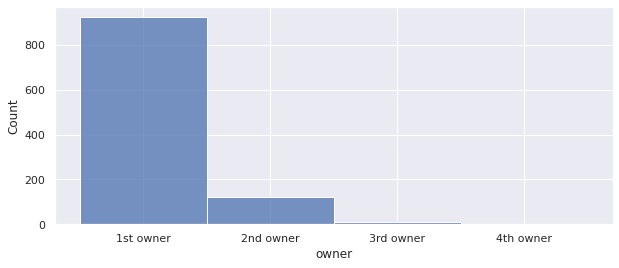

In [10]:
sns.set(rc={"figure.figsize":(10, 4)})
sns.histplot(data=bikes, x="owner",)

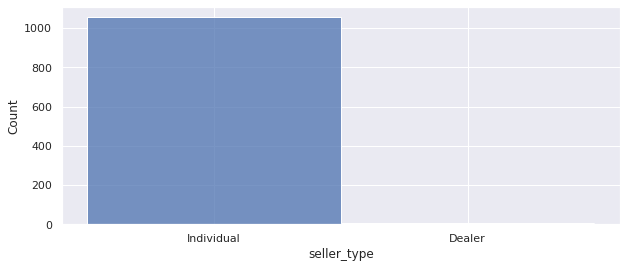

In [11]:
sns.set(rc={"figure.figsize":(10, 4)})
sns.histplot(data=bikes, x="seller_type",)

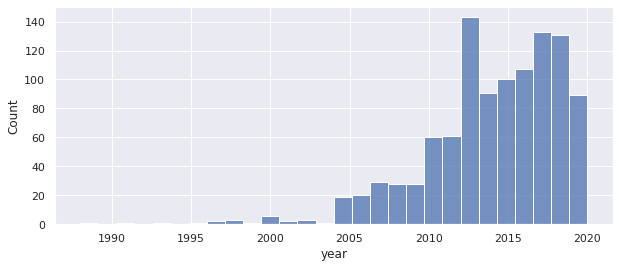

In [12]:
sns.set(rc={"figure.figsize":(10, 4)})
sns.histplot(data=bikes, x="year",)

Text(0.5, 1.0, 'bikes.corr()')

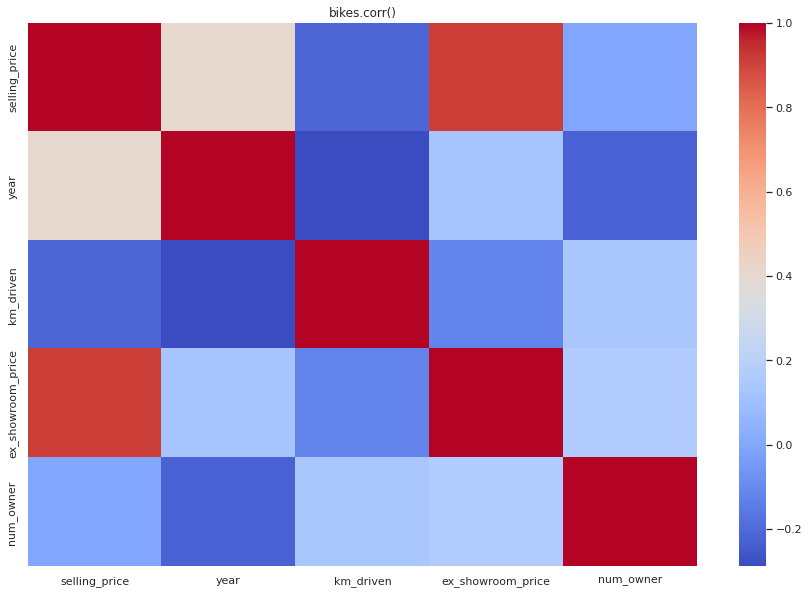

In [13]:
plt.figure(figsize=(15,10))
tc = bikes.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('bikes.corr()')

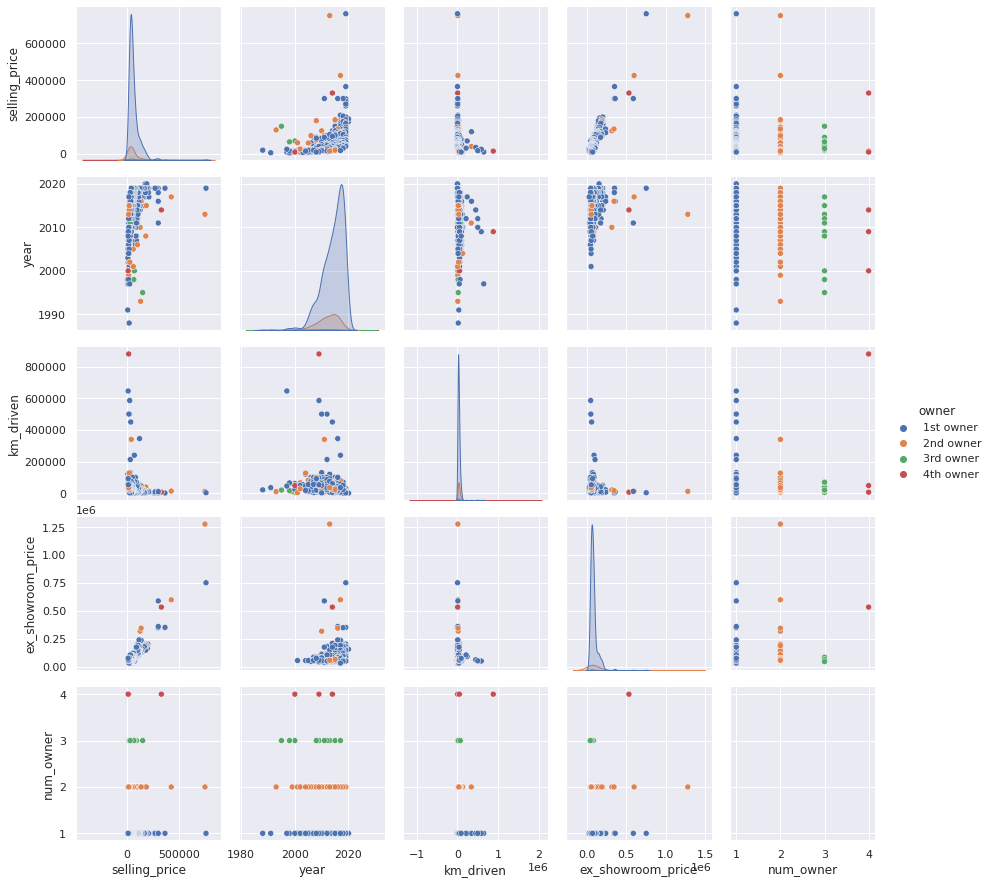

In [16]:
#Establece el estilo estético de las tramas
sns.set(style="ticks")
sns.set(rc={"figure.figsize":(15, 4)})
#matriz de diagramas de dispersion
sns.pairplot(bikes, hue="owner")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


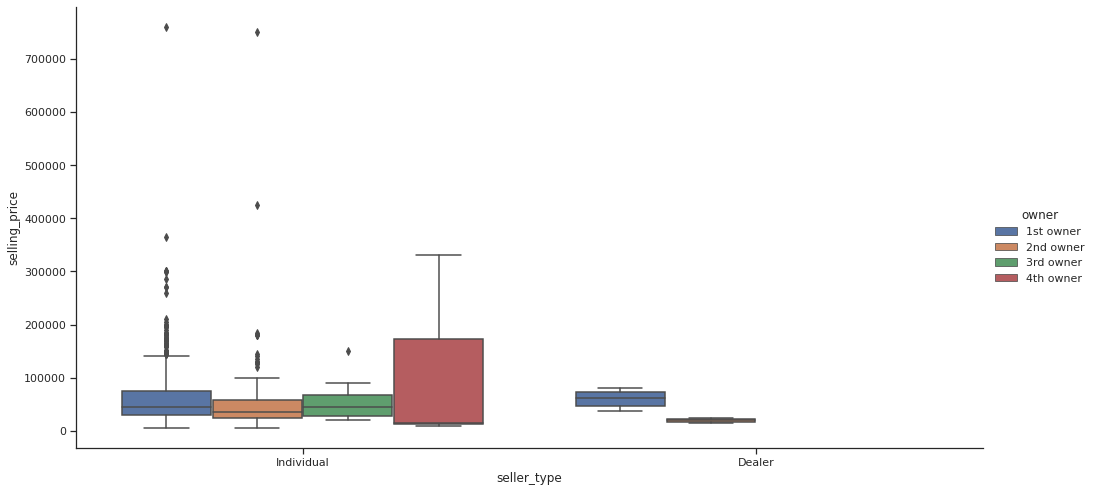

<Figure size 1080x720 with 0 Axes>

In [28]:

with sns.axes_style(style='ticks'):
  
  
  ax = sns.catplot("seller_type","selling_price", "owner" , data=bikes, kind="box", height=7, aspect=2)
plt.figure(figsize=(15,10))
sns.set(rc={"figure.figsize":(20, 4)})